# SPAM Modele Learning

Importation des libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pickle
#from pycaret.classification import *
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score


## Récupération et observation de la donnée

In [2]:
df = pd.read_csv(".\SMSSpamCollection",sep="\t", header= None) 

In [3]:
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Création de 'countspam', Cette fonction prend en parramettre un code regex. Elle parcourt chaque message retournant et comptant chaque message contenant une occurence du code.

In [4]:
def countspam(code):
    n=0
    countsp = 0
    countha = 0
    for line in df['message']: # Parcours des lignes
        x = re.findall(code, line)
        if x:
            #print(n, 'findall:', x) #liste des occurences
            #print(df['label'][n])   #Spam ou Ham
            #print(df['message'][n]) # le message contenant l'occurence
        
            if df['label'][n]== 'spam':
                countsp +=1
            else:
                countha +=1     
        n+=1
    print('Nombre de Spam :', countsp) #total de spam contenant le regex
    print('Nombre de Ham :', countha)  #total d'ham

Test de différent code regex

In [5]:
countspam("[0-9]{10}")

Nombre de Spam : 405
Nombre de Ham : 1


In [6]:
countspam("£|\$")

Nombre de Spam : 257
Nombre de Ham : 19


In [7]:
countspam("^I")

Nombre de Spam : 12
Nombre de Ham : 702


In [8]:
countspam("(?i)now")

Nombre de Spam : 209
Nombre de Ham : 525


In [9]:
countspam("(?i)reply")

Nombre de Spam : 98
Nombre de Ham : 44


In [10]:
countspam("txt")

Nombre de Spam : 106
Nombre de Ham : 10


In [11]:
countspam("(?i)(prize)")

Nombre de Spam : 89
Nombre de Ham : 0


Observons la longueur des commentaires. On utilise des histograme 

(array([ 67.,  99., 748., 708., 559., 440., 307., 305., 233., 213., 151.,
        150., 161., 157., 190., 216., 358., 300.,  42.,  31.,  14.,  12.,
         12.,   3.,   8.,  10.,   8.,   4.,   3.,   2.,  10.,   4.,   7.,
          1.,   2.,   7.,   4.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,
          1.,   1.,   0.,   1.,   5.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.  ,  11.08,  20.16,  29.24,  38.32,  47.4 ,  56.48,  65.56,
         74.64,  83.72,  92.8 , 101.88, 110.96, 120.04, 129.12, 138.2 ,
        147.28, 156.36, 165.44, 174.52, 183.6 , 192.68, 201.76, 210.84,
        219.92, 229.  , 238.08, 247.16, 256.24, 265.32, 274.4 , 283.48,
        292.56, 301.64, 310.72

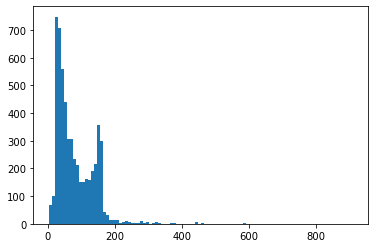

In [12]:
plt.hist(df['message'].str.len(), bins=100)

Séparons les hams et spam pour observer les différences dans la répartition

In [13]:
dfspam = df[df['label']=='spam']
dfham = df[df['label']=='ham']

(array([ 67.,  97., 747., 703., 552., 432., 302., 287., 224., 204., 132.,
        126., 133., 126., 111., 109., 164., 118.,  31.,  25.,  14.,  11.,
         12.,   3.,   7.,  10.,   8.,   4.,   3.,   2.,  10.,   4.,   7.,
          1.,   2.,   7.,   4.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,
          1.,   1.,   0.,   1.,   5.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.  ,  11.08,  20.16,  29.24,  38.32,  47.4 ,  56.48,  65.56,
         74.64,  83.72,  92.8 , 101.88, 110.96, 120.04, 129.12, 138.2 ,
        147.28, 156.36, 165.44, 174.52, 183.6 , 192.68, 201.76, 210.84,
        219.92, 229.  , 238.08, 247.16, 256.24, 265.32, 274.4 , 283.48,
        292.56, 301.64, 310.72

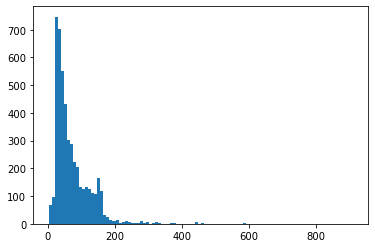

In [14]:
plt.hist(dfham['message'].str.len(), bins=100)

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

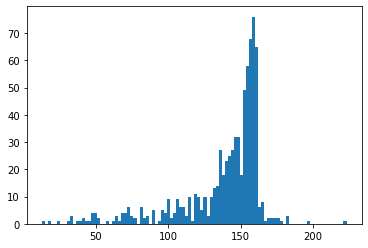

In [15]:
plt.hist(dfspam['message'].str.len(), bins=100)

On remarque que les spams et les hams forment deux piques distincts. La longueur semble être un indicateur pour différencier les spams et hams

# # Pre processing

Ajoutons une colonne contenant la longueur des messages

Création de countColumn. Cette fonction permet de rajouter une colonne nommé 'namecol'. Ell contiendras pour chaque message du df, le nombre d'occurence du 'code' regex y apparaisant.

Création de ColumnCountCreator. C'est une classe qui implemente les classes nécéssaire pour être inclus dans un pipeline.
Comme pour countColum, dans l'initialisation, il demande un code regex et un nom de colonne pour la créer.
Sa fonction fit ne fait rien.
Sa fonction transform crée la colonne d'occurence du code dans ledf renseigné.

In [16]:
def countColumn(code, namecol, df =df):
    n=0
    df.insert(1, namecol, 0, allow_duplicates=False)
    for line in df['message']: # Parcours des lignes
        x = re.findall(code, line)
        if x:
            df[namecol].array[n] = len(x)
        n+=1    


class ColumnCountCreator(BaseEstimator,TransformerMixin):
    def __init__(self, code, namecol):
        self.code = code
        self.namecol =namecol
    
    def fit(self, X, y =None):
        return self
    
    def transform(self, X, y =None):
        df = X.copy()
        n=0
        df.insert(1, self.namecol, 0, allow_duplicates=False)
        for line in df['message']: # Parcours des lignes
            x = re.findall(self.code, line)
            if x:
                df[self.namecol].array[n] = len(x)
            n+=1   
        return df
    
class ColumnlengthCreator(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y =None):
        return self
    
    def transform(self, X, y =None):
        df = X.copy()
        n=0
        df.insert(1, "length", "0")
        for x in range(df.message.size):
            df.length.array[x] = len(df.message.array[x])   
        return df
    
class ColumnlengthCreatorlast(BaseEstimator,TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y =None):
        return self
    
    def transform(self, X, y =None):
        df = X.copy()
        n=0
        df.insert(1, "length", "0")
        for x in range(df.message.size):
            df.length.array[x] = len(df.message.array[x])
        paramCol = ['length','free','phone','prize','give','devise','text','reply']
        df = df[paramCol]
        return df

Création des colonnes et sauvegarde du tout sous une pipeline

In [17]:

transfo_col = Pipeline(steps=[
    ('freeCol', ColumnCountCreator("(?i)(FREE)", "free")),
    ('phoneCol', ColumnCountCreator("[0-9]{10}", "phone")),
    ('prizeCol', ColumnCountCreator("(?i)(prize)", "prize")),
    ('giveCol', ColumnCountCreator("(?i)(give)", "give")),
    ('devCol', ColumnCountCreator("£|\$", "devise")),
    ('txtCol', ColumnCountCreator("txt", "text")),
    ('replyCol', ColumnCountCreator("(?i)(reply)", "reply")),
    ('lengthCol', ColumnlengthCreator())
])
pipedf =transfo_col.fit_transform(df)


In [18]:
pipedf.head()

,label,length,reply,text,devise,give,prize,phone,free,message
0,ham,111,0,0,0,0,0,0,0,"Go until jurong point, crazy.. Available only ..."
1,ham,29,0,0,0,0,0,0,0,Ok lar... Joking wif u oni...
2,spam,155,0,1,0,0,0,1,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,49,0,0,0,0,0,0,0,U dun say so early hor... U c already then say...
4,ham,61,0,0,0,0,0,0,0,"Nah I don't think he goes to usf, he lives aro..."


Encodage et standardisation des colonnes

In [19]:
from sklearn.preprocessing import LabelEncoder
column_cat = ['label']

label_encod = LabelEncoder()
dfe =label_encod.fit_transform(pipedf['label'])
y = dfe
y =pipedf['label']
paramCol = ['length','free','phone','prize','give','devise','text','reply']
Xdf =pipedf[paramCol]

standardis = Pipeline(steps=[('scaler', StandardScaler())])
X=standardis.fit_transform(Xdf)
Xdf

,length,free,phone,prize,give,devise,text,reply
0,111,0,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0
2,155,1,1,0,0,0,1,0
3,49,0,0,0,0,0,0,0
4,61,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5567,160,0,1,1,0,1,0,0
5568,36,0,0,0,0,0,0,0
5569,57,0,0,0,0,0,0,0
5570,125,1,0,0,0,0,0,0


# # Modeling

Classifiertest permet de tester des classifier et d'afficher la précision et la matrice de confusion.
Le split des donnée est aussi inclu.

La précision et prise car on souhaite éviter de mettre en spam de vrais message qui en seront ignoré.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

def classifiertest(classifier, X, y, testset_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testset_size, random_state=37, stratify=y)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    # Compute the accuracy (in %)
    #accuracy = precision_score(y_test, prediction)*100
    # Let's see the global performance
    #print('Precision of our model is equal ' + str(round(accuracy, 2)) + ' %.')
    plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.summer, # other color palettes : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                                 normalize=None)




Test de différent classifier

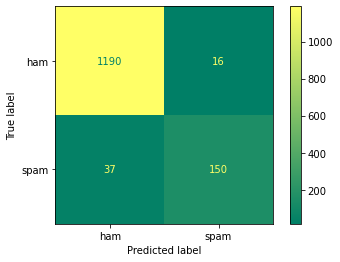

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# Initialisation with the choice of k = 3
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
classifiertest(KNN_classifier, X, y)

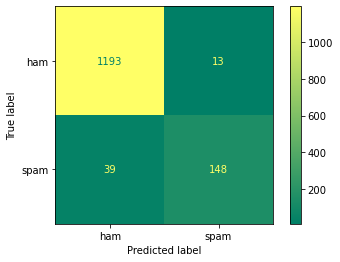

In [38]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
classifiertest(clf, X, y)

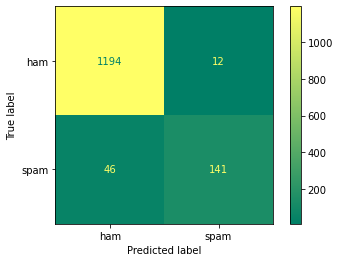

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
classifiertest(lr, X, y)

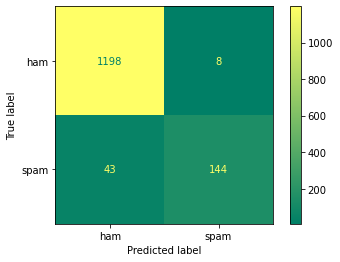

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
classifiertest(nb, Xdf, y)

Ce code à été mis pour tester la tokenisation de chaque terme.
CleanText prend un text. Il enleve la ponctuation.
Il prend chaque mots qu'il passe en minuscule et filtre en enlevant les stopwords.
Il stem chaque mot. La fonction stem permet de récpéré la racine des mots (exemple programmation et programmer a la même racine)
Il retourne ensuite la liste des mots.

In [41]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
import string
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)



On peut ensuite vectoriser le resultat pour avoir un autre dataframe.
Le nouveaux dataframe contenait plus de 8000 parrametre numérique

In [ ]:
#Xnlp = df['message'].apply(cleanText)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer()
#Xnlp=cv.fit_transform(Xnlp)

Ensuite pour optimiser un model. On a mis en place un grid searche sur un decision Classifier

In [22]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

#parameters = {'max_features':('auto', 'sqrt','log2'), 'max_depth':range(5, 25, 1)}
#clt = tree.DecisionTreeClassifier()
#parameters = {'alpha':(0, 0.5 ,1), 'fit_prior':(0,1)}
#clt = MultinomialNB()
parameters = {'alpha':(0, 0.5 ,1), 'solver' :('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs')}
clt = RidgeClassifier() #0.9776

clt = GridSearchCV(clt, parameters, scoring="precision")
X_train, X_test, y_train, y_test = train_test_split(Xdf, y, test_size=0.25, random_state=37, stratify=y)
clt.fit(X_train, y_train)



C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': (0, 0.5, 1),
                         'solver': ('auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs')},
             scoring='precision')

In [23]:
clt.best_score_

nan

In [24]:
clt.best_params_

{'alpha': 0, 'solver': 'auto'}

In [25]:
classifiertest(clt, X, y)

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 945, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "C:\Users\Greta\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Go

ValueError: pos_label=1 is not a valid label. It should be one of ['ham', 'spam']

Nous avons donc un meilleur Tree Classifier. Testons le. On laisse l'utilisateur saisir un message.

In [26]:
print("Write the SMS to test")
mss = input()


Write the SMS to test
Hey hey


Ensuite le message est transformer pour répondre au attente du modele

In [27]:
mssdt = {'message': [mss]}
mssdf = pd.DataFrame(mssdt)  
mssdf =transfo_col.fit_transform(mssdf)
Xpred =mssdf[paramCol]
Xpred

,length,free,phone,prize,give,devise,text,reply
0,7,0,0,0,0,0,0,0


On fait tourner le modele qui nous donne sa prédiction sur le message

In [29]:
res = clt.predict(Xpred)
res

array(['ham'], dtype='<U4')

In [30]:
fullpipe = Pipeline(steps=[
    ('freeCol', ColumnCountCreator("(?i)(FREE)", "free")),
    ('phoneCol', ColumnCountCreator("[0-9]{10}", "phone")),
    ('prizeCol', ColumnCountCreator("(?i)(prize)", "prize")),
    ('giveCol', ColumnCountCreator("(?i)(give)", "give")),
    ('devCol', ColumnCountCreator("£|\$", "devise")),
    ('txtCol', ColumnCountCreator("txt", "text")),
    ('replyCol', ColumnCountCreator("(?i)(reply)", "reply")),
    ('lengthCol', ColumnlengthCreatorlast()),
    ('ModeleRidge',clt)
])


# Un tour sur pycaret


On utilise pycaret pour tenter de reveler des domaine plus avantageux.

In [ ]:

#exp_clf101 = setup(data = pipedf, target = 'label', session_id=123) 

In [ ]:
#best_model = compare_models()

In [ ]:
#print(best_model)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rfc =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                       criterion='gini', max_depth=None, max_features='auto',
#                       max_leaf_nodes=None, max_samples=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=100,
#                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
#                       warm_start=False)
#classifiertest(rfc, X, y)

In [ ]:
#dt = create_model('rf')

In [ ]:
#dt = create_model('et')

# Pickle 

In [31]:
pickle.dump(fullpipe,open('modelRidge.pkl','wb'))

In [32]:
print("Write the SMS to test")
mss = input()
mssdt = {'message': [mss]}
mssdf = pd.DataFrame(mssdt)  
res =fullpipe.predict(mssdf)

Write the SMS to test
hey


In [33]:
res

array(['ham'], dtype='<U4')